In [1]:
import json
import time

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup

from pydantic import BaseModel
from typing import List, Optional

from selenium import webdriver

from mplsoccer.pitch import Pitch
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
driver = webdriver.Chrome()

In [5]:
whoscored_url = 'https://1xbet.whoscored.com/matches/1866136/live/europe-champions-league-2024-2025-benfica-barcelona'

In [7]:
driver.get(whoscored_url)

In [9]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [10]:
element = soup.select_one('script:-soup-contains("matchCentreData")')

In [13]:
matchdict = json.loads(element.text.split("matchCentreData: ")[1].split(',\n')[0])

In [15]:
match_events = matchdict['events']

In [17]:
df = pd.DataFrame(match_events)

In [19]:
df = df.rename(
    {
        'eventId': 'event_id',
        'expandedMinute': 'expanded_minute',
        'outcomeType': 'outcome_type',
        'isTouch': 'is_touch',
        'playerId': 'player_id',
        'teamId': 'team_id',
        'endX': 'end_x',
        'endY': 'end_y',
        'blockedX': 'blocked_x',
        'blockedY': 'blocked_y',
        'goalMouthZ': 'goal_mouth_z',
        'goalMouthY': 'goal_mouth_y',
        'isShot': 'is_shot',
        'cardType': 'card_type',
        'isGoal': 'is_goal'
    },
    axis=1
)

In [21]:
df.dropna(subset='player_id', inplace=True)

In [23]:
df = df.where(pd.notnull(df), None)

In [25]:
df['period_display_name'] = df['period'].apply(lambda x: x['displayName'])
df['type_display_name'] = df['type'].apply(lambda x: x['displayName'])
df['outcome_type_display_name'] = df['outcome_type'].apply(lambda x: x['displayName'])

In [27]:
df.drop(columns=["period", "type", "outcome_type"], inplace=True)

In [29]:
if 'is_goal' not in df.columns:
    print('missing goals')
    df['is_goal'] = False

In [31]:
len(df.index)

1615

In [33]:
df = df[~(df['type_display_name'] == "OffsideGiven")]

In [35]:
df

,id,event_id,minute,second,team_id,x,y,expanded_minute,qualifiers,satisfiedEventsTypes,...,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,is_goal,card_type,isOwnGoal,period_display_name,type_display_name,outcome_type_display_name
2,2.767664e+09,3,0,0.0,65,50.0,50.0,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 37, 216, 218]",...,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
3,2.767664e+09,4,0,2.0,65,42.1,52.4,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
4,2.767664e+09,5,0,3.0,65,31.6,39.5,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
5,2.767664e+09,6,0,5.0,65,35.9,68.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
6,2.767664e+09,7,0,7.0,65,39.8,91.4,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2.767737e+09,633,97,34.0,299,0.0,0.0,102,"[{'type': {'value': 33, 'displayName': 'Red'}}]",[68],...,NaN,NaN,NaN,None,None,"{'value': 33, 'displayName': 'Red'}",None,SecondHalf,Card,Successful
1619,2.767737e+09,1136,97,42.0,65,0.0,0.0,102,"[{'type': {'value': 31, 'displayName': 'Yellow...",[65],...,NaN,NaN,NaN,None,None,"{'value': 31, 'displayName': 'Yellow'}",None,SecondHalf,Card,Successful
1620,2.767737e+09,634,97,57.0,299,50.3,50.3,102,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 216, 218]",...,NaN,NaN,NaN,None,None,None,None,SecondHalf,Pass,Successful
1621,2.767737e+09,635,97,58.0,299,34.5,47.2,102,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 118, 120, 128, 36, 38, 216, 218]",...,NaN,NaN,NaN,None,None,None,None,SecondHalf,Pass,Unsuccessful


In [37]:
barca = df[df['team_id']==65]

In [39]:
barca

,id,event_id,minute,second,team_id,x,y,expanded_minute,qualifiers,satisfiedEventsTypes,...,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,is_goal,card_type,isOwnGoal,period_display_name,type_display_name,outcome_type_display_name
2,2.767664e+09,3,0,0.0,65,50.0,50.0,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 37, 216, 218]",...,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
3,2.767664e+09,4,0,2.0,65,42.1,52.4,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
4,2.767664e+09,5,0,3.0,65,31.6,39.5,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
5,2.767664e+09,6,0,5.0,65,35.9,68.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
6,2.767664e+09,7,0,7.0,65,39.8,91.4,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2.767736e+09,1132,94,59.0,65,25.3,32.5,99,[],[93],...,NaN,NaN,NaN,None,None,None,None,SecondHalf,BallRecovery,Successful
1616,2.767736e+09,1133,95,1.0,65,25.0,32.4,100,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 92, 119, 117, 123, 124, 127, 203, 205, 39...",...,NaN,NaN,NaN,None,None,None,None,SecondHalf,Pass,Successful
1617,2.767736e+09,1135,95,8.0,65,88.2,44.3,100,"[{'type': {'value': 214, 'displayName': 'BigCh...","[91, 24, 9, 10, 202, 1, 4, 13, 17, 20, 26]",...,NaN,4.4,48.8,True,True,None,None,SecondHalf,Goal,Successful
1619,2.767737e+09,1136,97,42.0,65,0.0,0.0,102,"[{'type': {'value': 31, 'displayName': 'Yellow...",[65],...,NaN,NaN,NaN,None,None,"{'value': 31, 'displayName': 'Yellow'}",None,SecondHalf,Card,Successful


In [63]:
barca['player_id'] = barca['player_id'].replace({29400: 9, 106885: 5, 261212: 20, 279423: 21, 73379: 25, 300447: 11, 301019: 23, 367164: 13,
                  382234: 10, 402197: 8, 422937: 6, 422938: 3, 444243: 18, 445092: 14, 454343: 17, 463838: 16,
                  472377: 26, 480249: 19, 498386: 2,512879: 35, 534792: 36, 349760: 7, 384711: 4})

C:\Users\risha\AppData\Local\Temp\ipykernel_25136\2979979007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca['player_id'] = barca['player_id'].replace({29400: 9, 106885: 5, 261212: 20, 279423: 21, 73379: 25, 300447: 11, 301019: 23, 367164: 13,


In [65]:
barca['passer'] = barca['player_id']
barca['recipient'] = barca['player_id'].shift(-1)

passes = barca[barca['type_display_name'] == 'Pass']
successful = passes[passes['outcome_type_display_name'] == 'Successful']

C:\Users\risha\AppData\Local\Temp\ipykernel_25136\2236187805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca['passer'] = barca['player_id']
C:\Users\risha\AppData\Local\Temp\ipykernel_25136\2236187805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca['recipient'] = barca['player_id'].shift(-1)


In [67]:
successful

,id,event_id,minute,second,team_id,x,y,expanded_minute,qualifiers,satisfiedEventsTypes,...,goal_mouth_y,is_shot,is_goal,card_type,isOwnGoal,period_display_name,type_display_name,outcome_type_display_name,passer,recipient
2,2.767664e+09,3,0,0.0,65,50.0,50.0,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 37, 216, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,11.0,17.0
3,2.767664e+09,4,0,2.0,65,42.1,52.4,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,17.0,4.0
4,2.767664e+09,5,0,3.0,65,31.6,39.5,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,4.0,2.0
5,2.767664e+09,6,0,5.0,65,35.9,68.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,2.0,3.0
6,2.767664e+09,7,0,7.0,65,39.8,91.4,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,2.767736e+09,1116,93,1.0,65,31.7,72.6,98,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 36, 38, 216, 218]",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,21.0,11.0
1583,2.767736e+09,1117,93,6.0,65,75.4,50.6,98,"[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 119, 117, 30, 205, 36, 38, 217, 218]",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,11.0,7.0
1586,2.767736e+09,1120,93,15.0,65,75.9,0.0,98,"[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 212, 35, 37, 216]",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,7.0,368091.0
1587,2.767736e+09,1121,93,18.0,65,62.9,9.1,98,"[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 119, 117, 30, 36, 37, 216, 218]",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,368091.0,21.0


In [69]:
subs = barca[barca['type_display_name'] == 'SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

In [71]:
firstSub

61

In [73]:
successful = successful[successful['minute'] < firstSub]

In [75]:
successful

,id,event_id,minute,second,team_id,x,y,expanded_minute,qualifiers,satisfiedEventsTypes,...,goal_mouth_y,is_shot,is_goal,card_type,isOwnGoal,period_display_name,type_display_name,outcome_type_display_name,passer,recipient
2,2.767664e+09,3,0,0.0,65,50.0,50.0,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 37, 216, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,11.0,17.0
3,2.767664e+09,4,0,2.0,65,42.1,52.4,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,17.0,4.0
4,2.767664e+09,5,0,3.0,65,31.6,39.5,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,4.0,2.0
5,2.767664e+09,6,0,5.0,65,35.9,68.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,2.0,3.0
6,2.767664e+09,7,0,7.0,65,39.8,91.4,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,2.767715e+09,744,58,1.0,65,65.9,51.8,63,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 119, 117, 30, 205, 36, 37, 217, 218]",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,19.0,8.0
1054,2.767715e+09,745,58,5.0,65,79.3,77.3,63,"[{'type': {'value': 141, 'displayName': 'PassE...","[91, 119, 117, 30, 205, 36, 37, 217, 218]",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,8.0,3.0
1057,2.767716e+09,747,58,8.0,65,87.2,76.7,63,"[{'type': {'value': 141, 'displayName': 'PassE...","[91, 119, 117, 30, 123, 205, 40, 46, 35, 38, 2...",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,3.0,19.0
1072,2.767716e+09,759,59,26.0,65,32.9,51.0,64,"[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 117, 30, 36, 38, 216, 218]",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,8.0,23.0


In [77]:
pas = pd.to_numeric(successful['passer'], downcast = 'integer')
rec = pd.to_numeric(successful['recipient'], downcast = 'integer')

successful['passer'] = pas
successful['recipient'] = rec

C:\Users\risha\AppData\Local\Temp\ipykernel_25136\1495589847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['passer'] = pas
C:\Users\risha\AppData\Local\Temp\ipykernel_25136\1495589847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['recipient'] = rec


In [79]:
successful

,id,event_id,minute,second,team_id,x,y,expanded_minute,qualifiers,satisfiedEventsTypes,...,goal_mouth_y,is_shot,is_goal,card_type,isOwnGoal,period_display_name,type_display_name,outcome_type_display_name,passer,recipient
2,2.767664e+09,3,0,0.0,65,50.0,50.0,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 37, 216, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,11,17
3,2.767664e+09,4,0,2.0,65,42.1,52.4,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,17,4
4,2.767664e+09,5,0,3.0,65,31.6,39.5,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,4,2
5,2.767664e+09,6,0,5.0,65,35.9,68.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,2,3
6,2.767664e+09,7,0,7.0,65,39.8,91.4,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,None,None,None,None,FirstHalf,Pass,Successful,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,2.767715e+09,744,58,1.0,65,65.9,51.8,63,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 119, 117, 30, 205, 36, 37, 217, 218]",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,19,8
1054,2.767715e+09,745,58,5.0,65,79.3,77.3,63,"[{'type': {'value': 141, 'displayName': 'PassE...","[91, 119, 117, 30, 205, 36, 37, 217, 218]",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,8,3
1057,2.767716e+09,747,58,8.0,65,87.2,76.7,63,"[{'type': {'value': 141, 'displayName': 'PassE...","[91, 119, 117, 30, 123, 205, 40, 46, 35, 38, 2...",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,3,19
1072,2.767716e+09,759,59,26.0,65,32.9,51.0,64,"[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 117, 30, 36, 38, 216, 218]",...,NaN,None,None,None,None,SecondHalf,Pass,Successful,8,23


In [81]:
average_locations = successful.groupby('passer').agg({'x':['mean'], 'y':['mean', 'count']})
average_locations.columns = ['x', 'y', 'count']

In [83]:
average_locations

,x,y,count
passer,,,
2,46.213333,75.025333,75
3,64.057778,89.102222,45
4,44.384615,36.439744,78
6,57.788000,42.576000,25
8,60.156923,60.623077,65
9,64.937500,71.250000,8
11,66.919355,73.387097,31
17,53.620290,49.356522,69
19,67.495238,22.752381,21


In [85]:
pass_between = successful.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'}, axis = 'columns', inplace = True)

pass_between = pass_between.merge(average_locations, left_on = 'passer', right_index = True)
pass_between = pass_between.merge(average_locations, left_on = 'recipient', right_index = True)

In [87]:
pass_between

,passer,recipient,pass_count,x_x,y_x,count_x,x_y,y_y,count_y
0,2,3,16,46.213333,75.025333,75,64.057778,89.102222,45
26,6,3,2,57.788000,42.576000,25,64.057778,89.102222,45
34,8,3,13,60.156923,60.623077,65,64.057778,89.102222,45
43,9,3,1,64.937500,71.250000,8,64.057778,89.102222,45
48,11,3,3,66.919355,73.387097,31,64.057778,89.102222,45
...,...,...,...,...,...,...,...,...,...
40,8,19,8,60.156923,60.623077,65,67.495238,22.752381,21
46,9,19,1,64.937500,71.250000,8,67.495238,22.752381,21
54,11,19,2,66.919355,73.387097,31,67.495238,22.752381,21
63,17,19,6,53.620290,49.356522,69,67.495238,22.752381,21


In [89]:
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() * 18)
average_locations['marker_size'] =(average_locations['count'] / average_locations['count'].max() * 3000)

In [91]:
from matplotlib.colors import to_rgba

color = np.array(to_rgba('white'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - 0.3)) + 0.3
color[:, 3] = c_transparency



(0.0, 80.0)

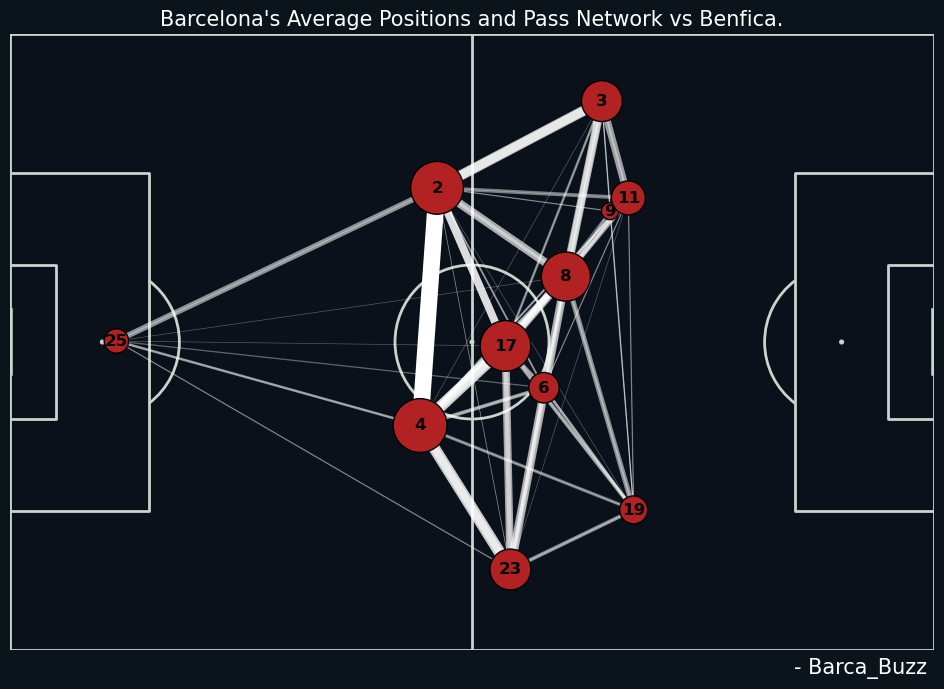

In [97]:
pitch = Pitch(pitch_type='statsbomb',
                      pitch_color='#0a111a', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5,8), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#0a141a')

pass_lines = pitch.lines(1.2*pass_between.x_x, 0.8*pass_between.y_x, 1.2*pass_between.x_y, 0.8*pass_between.y_y, ax=ax,
                           linewidth = pass_between.width/1.5, color = color, zorder = 1)

pass_nodes = pitch.scatter(1.2*average_locations.x, 0.8*average_locations.y,
                           s = (average_locations.marker_size)/2, c = '#b22222', edgecolors = 'black', alpha = 1, ax=ax)

for index, row in average_locations.iterrows():
    pitch.annotate(row.name, xy=(1.2 * row.x, 0.8 * row.y), c='black', va='center',
                   ha='center', size = 12, weight='bold', ax=ax)
    
plt.gca().invert_yaxis()

plt.title("Barcelona's Average Positions and Pass Network vs Benfica.", fontsize = 15, c = 'w')

endnote = "- Barca_Buzz"
plt.figtext(0.8, 0.1, endnote, ha="center", va="top", fontsize=15, color="white")

plt.xlim(0,120)
plt.ylim(0,80)